# Rigde Regression

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2

In [3]:
from proj1_helpers import load_csv_data

data_path = 'data/train.csv'
y, tx, ids = load_csv_data(data_path, sub_sample=False)


### Validate the data
In order to get a good feel of the dataset, we do some inference on the set. In the plot below we see that we have a lot of values that are -999. Those should be handled in the dataset.

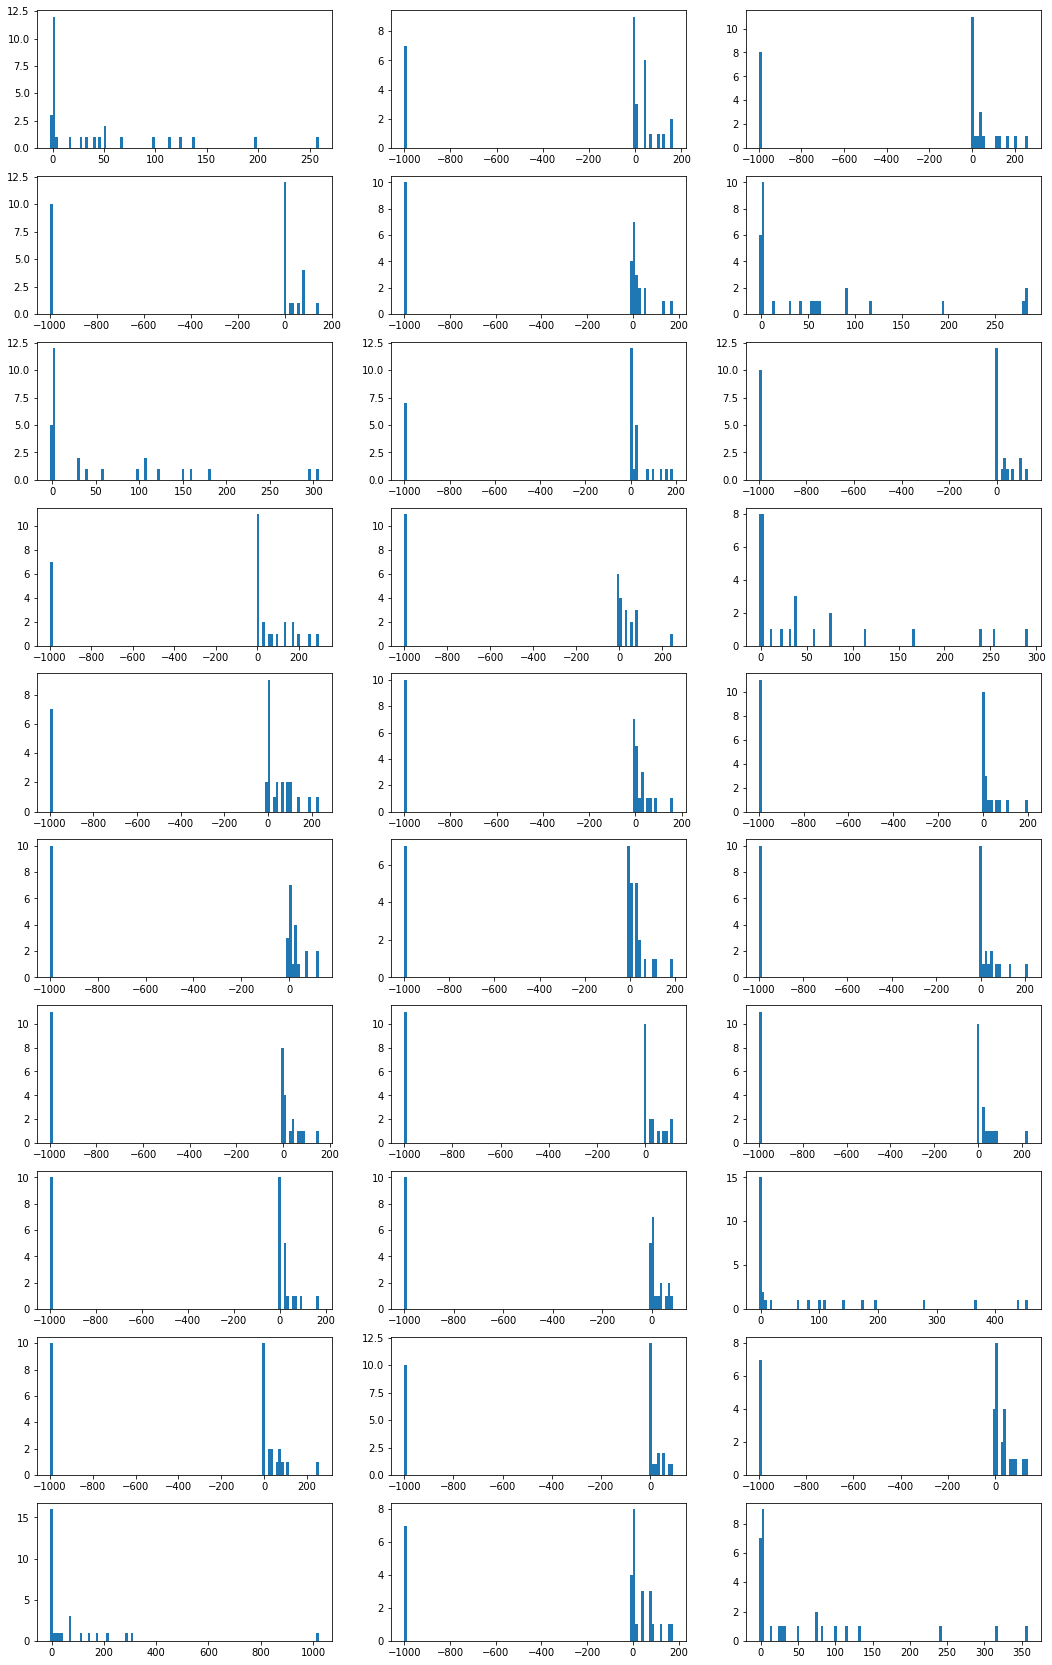

In [5]:
def plot_hists(tx):
    num_rows = 10
    num_cols = 3
    f, a = plt.subplots(num_rows, num_cols, figsize=(18,30))

    a = a.ravel()

    for idx, ax in enumerate(a):
        ax.hist(tx[idx], bins = 100)
        
plot_hists(tx)

/Users/theodor/anaconda3/envs/ada/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/theodor/anaconda3/envs/ada/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


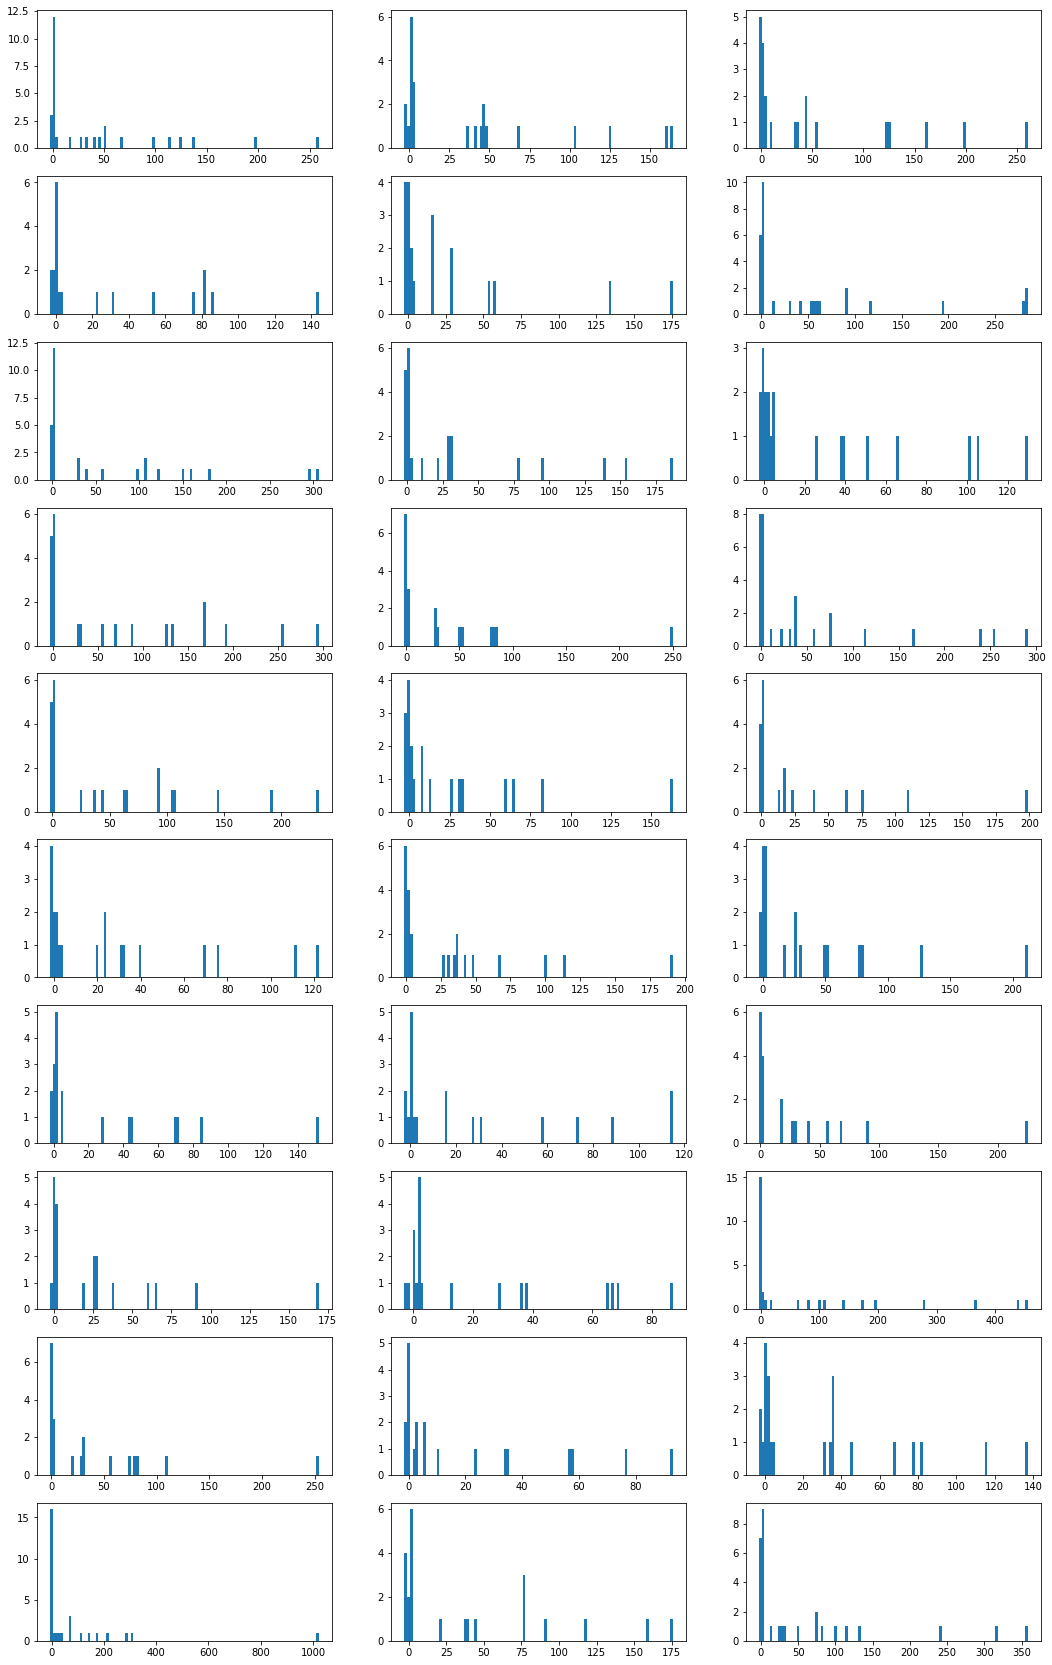

In [12]:
tx[tx==-999] = np.nan

plot_hists(tx)

In [13]:
mean_tx = np.mean(tx, axis=0)
std_tx = np.std(tx, axis=0)
max_tx = np.max(tx, axis=0)
min_tx = np.min(tx, axis=0)


(array([            nan,  4.92398193e+01,  8.11819816e+01,  5.78959617e+01,
                    nan,             nan,             nan,  2.37309984e+00,
         1.89173324e+01,  1.58432217e+02,  1.43760943e+00, -1.28304708e-01,
                    nan,  3.87074191e+01, -1.09730480e-02, -8.17107200e-03,
         4.66602072e+01, -1.95074680e-02,  4.35429640e-02,  4.17172345e+01,
        -1.01191920e-02,  2.09797178e+02,  9.79176000e-01,             nan,
                    nan,             nan,             nan,             nan,
                    nan,  7.30645914e+01]),
 array([         nan,  35.34481492,  40.82860887,  63.65555431,
                 nan,          nan,          nan,   0.78290955,
         22.2734492 , 115.70588372,   0.84474126,   1.19358245,
                 nan,  22.41203584,   1.21407622,   1.81675941,
         22.06487828,   1.26497962,   1.81660763,  32.8946274 ,
          1.81221908, 126.49925272,   0.97742435,          nan,
                 nan,          nan,     